In [29]:
import os
import numpy as np
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [30]:
with zipfile.ZipFile('archive.zip','r') as f:
    f.extractall('archive')

In [31]:
crops = ['jute','maize','rice','sugarcane','wheat']
paths = ['archive/crop_images','archive/kag2','archive/test_crop_image']

In [32]:
img_height = 256 
img_width = 256
batch_size = 32
def load_data(path):
    data = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        batch_size=batch_size, 
        image_size=(img_height,img_width),
        shuffle=True, seed=0
    )
    return data


In [33]:
train = load_data(paths[1])
dev = load_data(paths[0])
class_names = train.class_names

Found 804 files belonging to 5 classes.
Found 201 files belonging to 5 classes.


In [34]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
dev = dev.cache().prefetch(buffer_size=AUTOTUNE)


In [35]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [36]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])


In [37]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)       

In [38]:
epochs = 15
history = model.fit(
    train,
    validation_data = dev,epochs = epochs
)

Epoch 1/15
26/26 [==============================] - 3s 81ms/step - loss: 3.6188 - accuracy: 0.2496 - val_loss: 1.4583 - val_accuracy: 0.4279
Epoch 2/15
26/26 [==============================] - 2s 69ms/step - loss: 1.3746 - accuracy: 0.4518 - val_loss: 1.0409 - val_accuracy: 0.5821
Epoch 3/15
26/26 [==============================] - 2s 68ms/step - loss: 1.0033 - accuracy: 0.6300 - val_loss: 0.6274 - val_accuracy: 0.7612
Epoch 4/15
26/26 [==============================] - 2s 71ms/step - loss: 0.7200 - accuracy: 0.7564 - val_loss: 0.3245 - val_accuracy: 0.9104
Epoch 5/15
26/26 [==============================] - 2s 71ms/step - loss: 0.3671 - accuracy: 0.8983 - val_loss: 0.1259 - val_accuracy: 0.9751
Epoch 6/15
26/26 [==============================] - 2s 72ms/step - loss: 0.1492 - accuracy: 0.9641 - val_loss: 0.0762 - val_accuracy: 0.9950
Epoch 7/15
26/26 [==============================] - 2s 72ms/step - loss: 0.1334 - accuracy: 0.9716 - val_loss: 0.0417 - val_accuracy: 0.9950
Epoch 8/15
26

In [39]:
acc = history.history['accuracy']
dev_acc = history.history['val_accuracy']
loss = history.history['loss']
dev_loss = history.history['val_loss']
epochs_range = range(epochs)


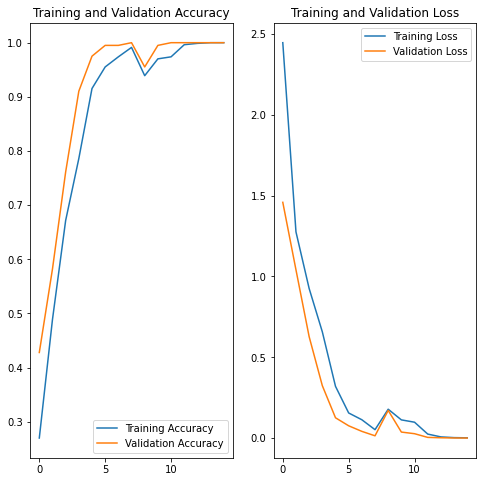

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, dev_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, dev_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [41]:


img = tf.keras.preprocessing.image.load_img(
        os.path.join(paths[2],'jute002.jpg'),
        target_size = (img_height,img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_tensor = tf.expand_dims(img_array, 0)


In [42]:
pred = model.predict(img_tensor)

In [43]:
score = tf.nn.softmax(pred)

In [44]:

class_names[np.argmax(score)]
100*np.max(score)

99.94767308235168

In [46]:
class_names[np.argmax(score)]

'jute'